In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
df = pd.read_csv('data/all_airlines.csv')

# Choosing the companies

In [30]:
pd.set_option('display.max_rows', None)
airline_counts = df['AirlineName'].value_counts()

airlines_more_than_1000 = airline_counts[airline_counts > 1000].index.tolist()

print(len(airlines_more_than_1000))

32


So we will compare 32 airlines to compare their performace, since these are the 32 out of all the airline that has 1000 entries here.

In [39]:
# Filter the DataFrame to keep only the rows with airlines more than 1000
# filtered_df = df[df['AirlineName'].isin(airlines_more_than_1000)]
# print(filtered_df)
airline_counts = df.groupby('AirlineName').size()

# Filter airlines with counts more than 1000
airlines_more_than_1000 = airline_counts[airline_counts > 1000].index

# Filter the DataFrame to keep only the rows with airlines more than 1000
filtered_df = df[df['AirlineName'].isin(airlines_more_than_1000)]

filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 65615 entries, 1723 to 128630
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             65615 non-null  int64  
 1   AirlineName            65615 non-null  object 
 2   CabinType              65615 non-null  object 
 3   DateFlown              65615 non-null  object 
 4   DatePub                65615 non-null  object 
 5   EntertainmentRating    65615 non-null  int64  
 6   FoodRating             65615 non-null  int64  
 7   GroundServiceRating    65615 non-null  int64  
 8   OriginCountry          65615 non-null  object 
 9   OverallScore           65615 non-null  float64
 10  Recommended            65615 non-null  object 
 11  Review                 65615 non-null  object 
 12  Route                  65615 non-null  object 
 13  SeatComfortRating      65615 non-null  int64  
 14  ServiceRating          65615 non-null  int64  
 15  Slu

In [40]:
# Select only the columns containing ratings
rating_columns = ['FoodRating', 'EntertainmentRating', 'GroundServiceRating', 'SeatComfortRating', 'ServiceRating', 'ValueRating', 'WifiRating', 'OverallScore']

# Group the DataFrame by 'AirlineName' and calculate the mean for each rating category
average_ratings = df.groupby('AirlineName')[rating_columns].mean()

# Print the average ratings for each company
print(average_ratings)


                                  FoodRating  EntertainmentRating  \
AirlineName                                                         
AB Aviation                         2.000000             0.000000   
ANA All Nippon Airways              3.175407             2.815552   
ASKY Airlines                       1.454545             0.500000   
ATA Airlines                        1.500000             0.000000   
Adria Airways                       1.241758             0.604396   
Aegean Airlines                     3.130556             1.187500   
Aer Lingus                          2.073040             1.525242   
Aero VIP                            0.000000             0.000000   
AeroItalia                          1.000000             0.000000   
Aerocaribbean                       0.000000             0.000000   
Aeroflot Russian Airlines           2.798305             2.189831   
Aerolineas Argentinas               1.798319             1.126050   
Aeromar                           

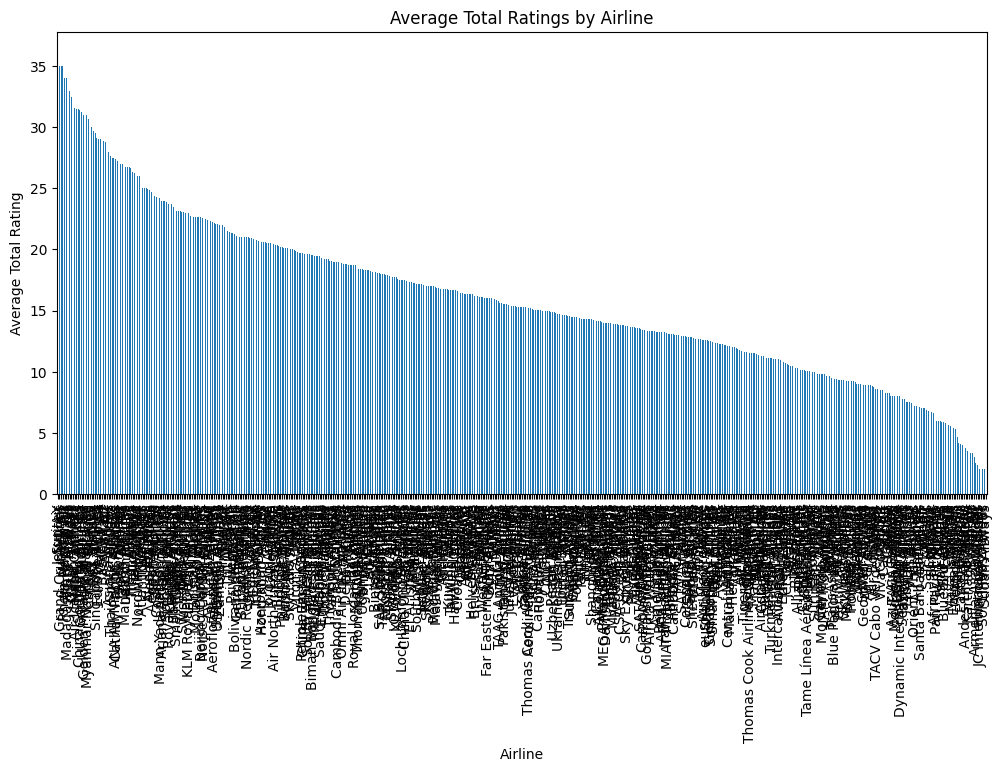

In [44]:
# Create a new column containing the sum of all ratings for each airline
df['TotalRating'] = df[rating_columns].sum(axis=1)

# Group the DataFrame by 'AirlineName' and calculate the mean of the total ratings
average_total_ratings = df.groupby('AirlineName')['TotalRating'].mean()
average_total_ratings = average_total_ratings.sort_values(ascending=False)
# Plot the graph
plt.figure(figsize=(12, 6))
average_total_ratings.plot(kind='bar')
plt.title('Average Total Ratings by Airline')
plt.xlabel('Airline')
plt.ylabel('Average Total Rating')
plt.xticks(rotation=90)
plt.show()

In [46]:
print(average_total_ratings)

AirlineName
Sun-Air                             36.000000
JetsuiteX                           35.000000
Grand Cru Airlines                  35.000000
Lubeck Air                          35.000000
Rhein-Neckar Air                    34.000000
Air Rarotonga                       34.000000
Madagasikara Airways                33.500000
TUS Airways                         33.000000
FMI Air                             32.500000
Qatar Airways                       31.592593
Hainan Airlines                     31.534826
Air Iceland Connect                 31.500000
Nauru Airlines                      31.500000
China Southern Airlines             31.371951
Garuda Indonesia                    31.260321
Hunnu Air                           31.000000
Golden Myanmar Airlines             31.000000
Manta Air                           31.000000
Myanmar National Airlines           30.636364
Cathay Dragon                       30.322581
Tibet Airlines                      30.000000
Vistara               

In [58]:
from sklearn.metrics.pairwise import cosine_similarity
# Reshape the DataFrame to have companies as columns and ratings as rows
ratings_matrix = df.pivot_table(index='AirlineName', columns='Unnamed: 0', values='TotalRating')

# Calculate cosine similarity between companies
similarity_matrix = cosine_similarity(ratings_matrix.fillna(0))

# Convert the similarity matrix to a DataFrame for easier manipulation
similarity_df = pd.DataFrame(similarity_matrix, index=ratings_matrix.index, columns=ratings_matrix.index)

# Identify closest competitors for each company
closest_competitors = {}
for company in similarity_df.index:
    closest_competitors[company] = similarity_df.loc[company].sort_values(ascending=False).index[1:3]  # Exclude itself and select top 3 closest competitors

# Print the closest competitors for each company
for company, competitors in closest_competitors.items():
    print(f"Closest competitors for {company}: {', '.join(competitors)}")

Closest competitors for AB Aviation: Pegasus Airlines, Pacific Airlines
Closest competitors for ANA All Nippon Airways: Pegasus Airlines, Pacific Airlines
Closest competitors for ASKY Airlines: AB Aviation, Pegasus Airlines
Closest competitors for ATA Airlines: AB Aviation, Pegasus Airlines
Closest competitors for Adria Airways: AB Aviation, Pegasus Airlines
Closest competitors for Aegean Airlines: AB Aviation, Pegasus Airlines
Closest competitors for Aer Lingus: AB Aviation, Pegasus Airlines
Closest competitors for Aero VIP: AB Aviation, Pegasus Airlines
Closest competitors for AeroItalia: AB Aviation, Pegasus Airlines
Closest competitors for Aerocaribbean: PAWA Dominicana, Pacific Airlines
Closest competitors for Aeroflot Russian Airlines: AB Aviation, PAWA Dominicana
Closest competitors for Aerolineas Argentinas: AB Aviation, PAWA Dominicana
Closest competitors for Aeromar: AB Aviation, PAWA Dominicana
Closest competitors for Aeromexico: AB Aviation, PAWA Dominicana
Closest competit

In [59]:
closest_competitors

{'AB Aviation': Index(['Pegasus Airlines', 'Pacific Airlines'], dtype='object', name='AirlineName'),
 'ANA All Nippon Airways': Index(['Pegasus Airlines', 'Pacific Airlines'], dtype='object', name='AirlineName'),
 'ASKY Airlines': Index(['AB Aviation', 'Pegasus Airlines'], dtype='object', name='AirlineName'),
 'ATA Airlines': Index(['AB Aviation', 'Pegasus Airlines'], dtype='object', name='AirlineName'),
 'Adria Airways': Index(['AB Aviation', 'Pegasus Airlines'], dtype='object', name='AirlineName'),
 'Aegean Airlines': Index(['AB Aviation', 'Pegasus Airlines'], dtype='object', name='AirlineName'),
 'Aer Lingus': Index(['AB Aviation', 'Pegasus Airlines'], dtype='object', name='AirlineName'),
 'Aero VIP': Index(['AB Aviation', 'Pegasus Airlines'], dtype='object', name='AirlineName'),
 'AeroItalia': Index(['AB Aviation', 'Pegasus Airlines'], dtype='object', name='AirlineName'),
 'Aerocaribbean': Index(['PAWA Dominicana', 'Pacific Airlines'], dtype='object', name='AirlineName'),
 'Aeroflo

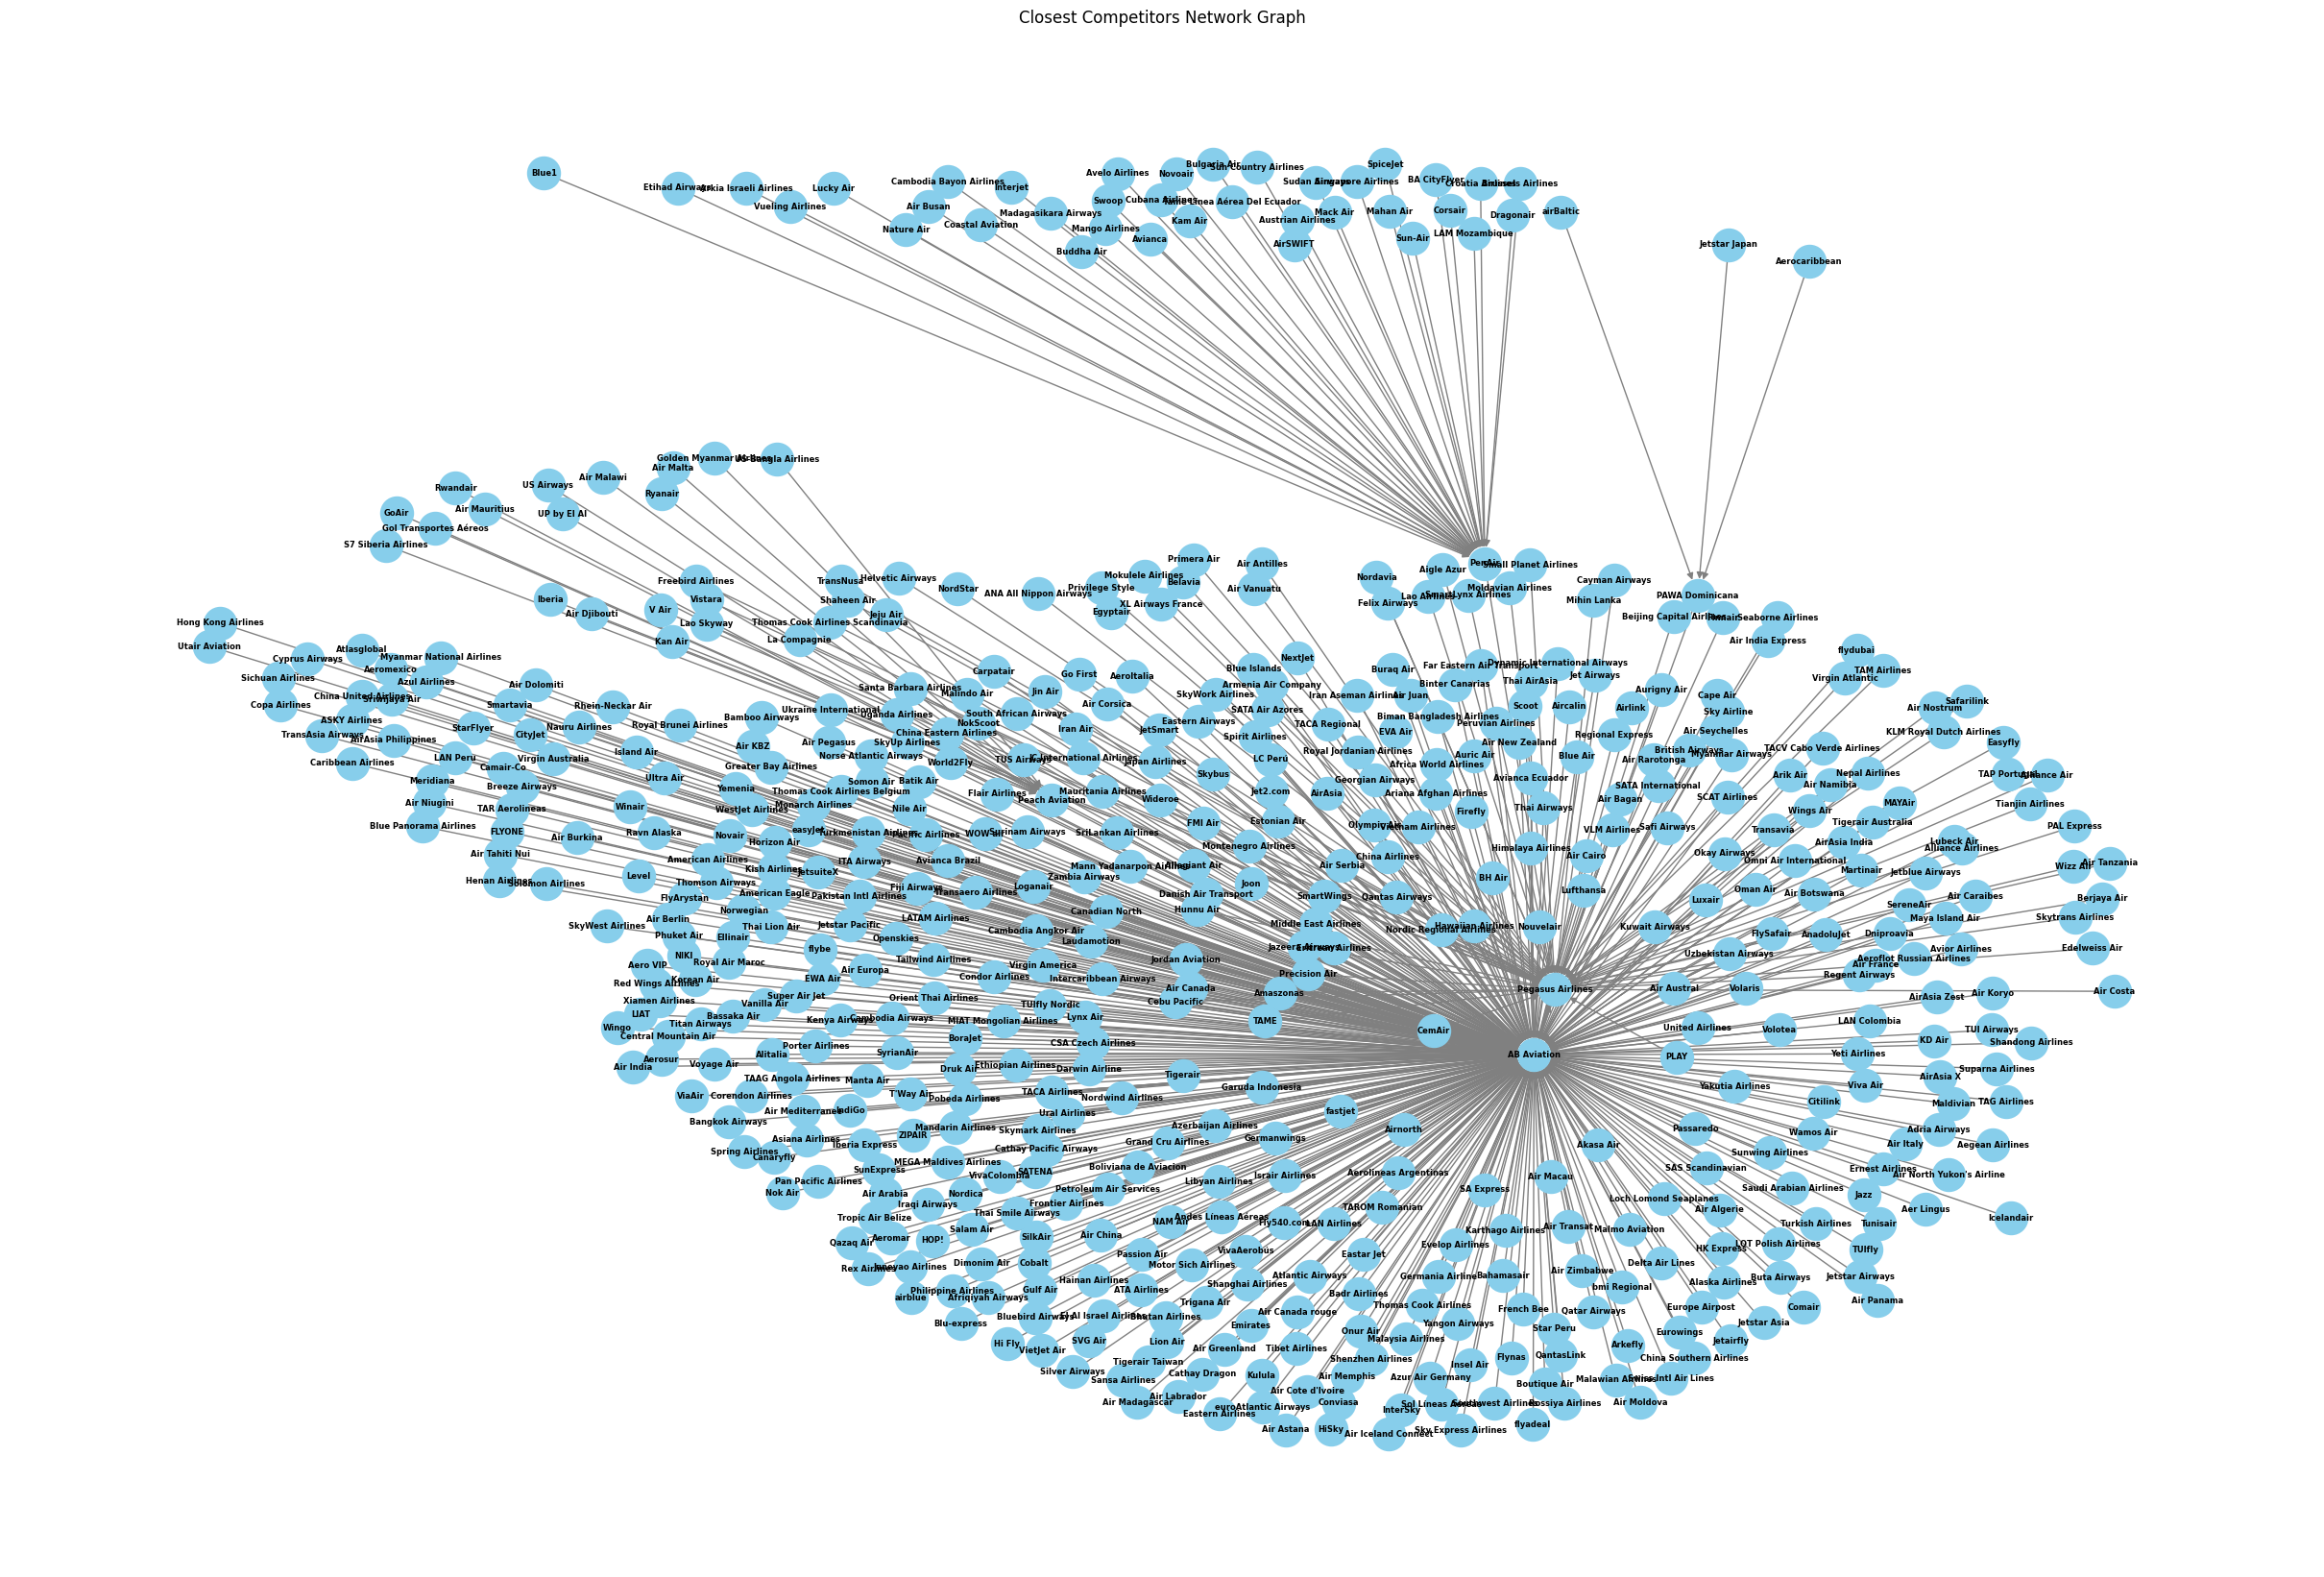

In [69]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Assuming you have already calculated the closest competitors as closest_competitors dictionary

# Create a directed graph
G = nx.DiGraph()

# Add nodes for each company
for company in closest_competitors.keys():
    G.add_node(company)

# Add edges between companies based on closest competitors (limited to 2)
for company, competitors in closest_competitors.items():
    for competitor in competitors[:1]:  # Limit to 2 closest competitors
        G.add_edge(company, competitor)

# Position nodes using spring layout
pos = nx.spring_layout(G)

# Draw the graph
plt.figure(figsize=(24, 16))
nx.draw(G, pos, with_labels=True, node_size=600, node_color='skyblue', font_size=6, font_weight='bold', edge_color='gray')
plt.title('Closest Competitors Network Graph')
plt.show()